# Association Analysis - Apriori Algorithm

## Details

* Jupyter notebook, 
* the dataset [01],
* and the FPgrowth Algorithm [02].
* and the Apriori Algorithm (apriory.py)[03]. Note that the apriory.py file is modified to run with Python 3.

The datasets to be used are :

1.dataset_one.csv

2.dataset_two.csv

3.dataset_three.csv

In [1]:
# Import your Libraries
import pandas as pd
from pandas import DataFrame
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import apriori
from apriori import getItemSetTransactionList
from apriori import returnItemsWithMinSupport
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from apriori import runApriori
from apriori import printResults
from apriori import dataFromFile
from apriori import joinSet
from apriori import subsets
from IPython.display import Image
# Above are the only libraries you can use. Do not make any changes above.
# -10 will be deducted, if you use additional libraries apart from these.

# - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

ScreenShot of the dataset.csv


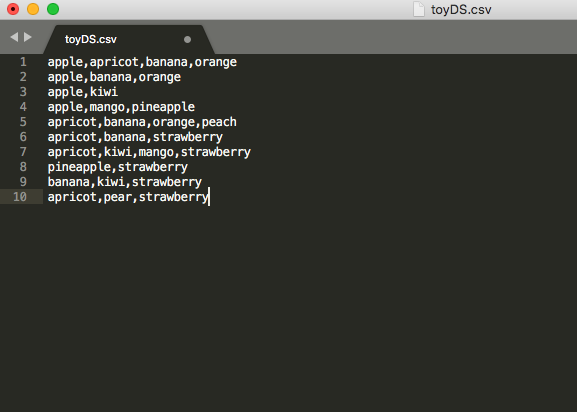

In [2]:
from IPython.display import Image
print ('ScreenShot of the dataset.csv')
Image("SampleScreen01.png")

                                     ########## Task 1 ###########
                                     
--> Before you start, Please modify your dataset '(given dataset).csv' to look like the toyDS.csv.  

--> Export the modified data into new dataset named 'dataset.csv'

--> Read and print first 10 transactions of dataset.csv







In [3]:
########## Code for Task 1 #############

# Converting the given dataset

data_filter = {}
data = pd.read_csv('dataset_one.csv',error_bad_lines=False)

for ind in data.index:
    if data['Member_number'][ind] in data_filter:
      data_1 = data_filter[data['Member_number'][ind]]
      data_1.append(data['itemDescription'][ind])
      data_filter[data['Member_number'][ind]] =data_1
    else:
      data_filter[data['Member_number'][ind]] = [data['itemDescription'][ind]]

values = data_filter.values()
for val in values:
  with open("dataset.csv", "a") as fp:
      wr = csv.writer(fp, dialect='excel')
      wr.writerow(val)


/var/folders/3m/lm4crwzd05925wnqr9f3qtfw0000gn/T/ipykernel_12726/1118534781.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('dataset_one.csv',error_bad_lines=False)
Skipping line 38767: expected 3 fields, saw 10
Skipping line 38768: expected 3 fields, saw 13
Skipping line 38769: expected 3 fields, saw 10
Skipping line 38770: expected 3 fields, saw 7
Skipping line 38771: expected 3 fields, saw 5
Skipping line 38772: expected 3 fields, saw 26
Skipping line 38773: expected 3 fields, saw 13
Skipping line 38774: expected 3 fields, saw 19
Skipping line 38775: expected 3 fields, saw 9
Skipping line 38776: expected 3 fields, saw 9
Skipping line 38777: expected 3 fields, saw 14
Skipping line 38778: expected 3 fields, saw 27
Skipping line 38779: expected 3 fields, saw 21
Skipping line 38780: expected 3 fields, saw 11
Skipping line 38781: expected 3 fields, saw 11
Skipping line 38

In [4]:
# Loading the dataset

df = pd.read_csv('dataset.csv',error_bad_lines=False)
print(df.head(10))

/var/folders/3m/lm4crwzd05925wnqr9f3qtfw0000gn/T/ipykernel_12726/2863788814.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('dataset.csv',error_bad_lines=False)
Skipping line 6: expected 13 fields, saw 26
Skipping line 8: expected 13 fields, saw 19
Skipping line 11: expected 13 fields, saw 14
Skipping line 12: expected 13 fields, saw 27
Skipping line 13: expected 13 fields, saw 21
Skipping line 16: expected 13 fields, saw 19
Skipping line 18: expected 13 fields, saw 21
Skipping line 20: expected 13 fields, saw 26
Skipping line 21: expected 13 fields, saw 17
Skipping line 22: expected 13 fields, saw 15
Skipping line 23: expected 13 fields, saw 14
Skipping line 26: expected 13 fields, saw 16
Skipping line 31: expected 13 fields, saw 21
Skipping line 32: expected 13 fields, saw 21
Skipping line 38: expected 13 fields, saw 17
Skipping line 39: expected 13 fields, saw 17
Skipp

                                                                          tropical fruit  \
whole milk                butter           female sanitary products           pot plants   
pip fruit                 sausage          frankfurter                              pork   
other vegetables          soda             citrus fruit                           onions   
whole milk                cling film/bags  other vegetables                          ham   
other vegetables          other vegetables butter milk                    tropical fruit   
whole milk                decalcifier      dessert                                pastry   
tropical fruit            whole milk       beef                            cream cheese    
chicken                   beef             tropical fruit                            oil   
butter                    beef             other vegetables                       pastry   
packaged fruit/vegetables fish             frozen meals              specialty c

In [5]:


transactions_list = []


for i in range(0,len(df)):
    transactions_list.append([str(df.values[i,j]) for j in range(0,10) if str(df.values[i,j])!='nan'])

                                  ######## Task 2 ########
    
--> In this task, You should be able to execute and print FPgrowth results using mlxtend.

--> "DO NOT USE ANY OTHER LIBRARY !!!".

--> Execute apriori algorithm atleast 3 times for different combinations of support and print the results for the dataset.

--> Please do explain your reasoning for each combinations.





In [6]:
######### Code for Task 2 #############

te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

dataset.head()


res1=fpgrowth(dataset,min_support=0.05, use_colnames=True)


res2=fpgrowth(dataset,min_support=0.04, use_colnames=True)


res3=fpgrowth(dataset,min_support=0.03, use_colnames=True)

print("\nfor min_support = 0.05\n")
print(res1)
print("\nfor min_support = 0.04\n")
print(res2)
print("\nfor min_support = 0.03\n")
print(res3)

# Support denotes how frequently an item will appear in the dataset.
# first I used minimum support value as 0.05 and got 29 itemsets.
# Then I further decreased the minimum support to 0.04 value and got 36 itemsets.
# Later I decreased the minimum support value to 0.03 and got 52 itemsets.
# increasing the minimum support value directly effect in decreasing number of itemset.




for min_support = 0.05

     support                        itemsets
0   0.227948                    (whole milk)
1   0.181295              (other vegetables)
2   0.111744                 (shopping bags)
3   0.105151               (root vegetables)
4   0.070870                (tropical fruit)
5   0.062497                        (coffee)
6   0.052740                     (chocolate)
7   0.073441         (fruit/vegetable juice)
8   0.172593                          (soda)
9   0.083725                 (domestic eggs)
10  0.051092                   (white bread)
11  0.118534                 (bottled water)
12  0.078517                   (brown bread)
13  0.104492                        (pastry)
14  0.084582                    (newspapers)
15  0.060322             (frozen vegetables)
16  0.052718                  (citrus fruit)
17  0.052279                 (cream cheese )
18  0.090977            (whipped/sour cream)
19  0.083593                     (margarine)
20  0.062959                  

                                  ######## Task 3 ########
                                  
--> In this task, You should be able to execute and print apriory results by making use of apriory.py

--> "DO NOT USE ANY OTHER LIBRARY !!!".

--> Execute apriori algorithm atleast 3 times for different combinations of confidence and support and print the results for the dataset.

--> Please do explain your reasoning for each combinations.






In [7]:
########### Code for Task 3 ##############


items,apriori_rules = apriori.runApriori(transactions_list,0.03,0.2)

print(items)
print(apriori_rules)




items,apriori_rules = apriori.runApriori(transactions_list,0.02,0.3)

print(items)
print(apriori_rules)



items,apriori_rules = apriori.runApriori(transactions_list,0.01,0.4)

print(items)
print(apriori_rules)



# When we increase the confidence the item set size is reducing 
# Support denotes how frequently an item will appear in the dataset.
# Confidence will denote how often both the items will occur given the number of times one item occurs.
# Since value of minimum supprot and confidence is Inversely Proportional to number of itemsets. I increased the confidence with decreasing minimum support.

[(('frozen vegetables',), 0.06032171581769437), (('tropical fruit',), 0.07086977541423109), (('domestic eggs',), 0.08372522304751022), (('pip fruit',), 0.06295873071682855), (('long life bakery product',), 0.036918208587878525), (('bottled water',), 0.1185338197160814), (('coffee',), 0.062497253109480067), (('curd',), 0.06084911879752121), (('cream cheese ',), 0.05227882037533512), (('onions',), 0.03724783545027029), (('sliced cheese',), 0.03296268623917725), (('root vegetables',), 0.10515096910297543), (('soda',), 0.1725926251483321), (('butter',), 0.0717268052564497), (('UHT-milk',), 0.03790708917505384), (('waffles',), 0.04285149211093043), (('citrus fruit',), 0.05271832285852415), (('butter milk',), 0.03658858172548675), (('pork',), 0.03197380565200193), (('oil',), 0.03263305937678548), (('bottled beer',), 0.07449567090054059), (('margarine',), 0.08359337230255351), (('whole milk',), 0.22794796290599043), (('other vegetables',), 0.1812947743154749), (('fruit/vegetable juice',), 0.0